<a href="https://colab.research.google.com/github/Xayzan/1stopai/blob/main/chatbot_good_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle
import numpy as np

In [ ]:
with open("train_qa-220120-145526.txt", "rb") as fp:   # Unpickling
    train_data =  pickle.load(fp)

In [ ]:
with open("test_qa-220120-145430.txt", "rb") as fp:   # Unpickling
    test_data =  pickle.load(fp)


In [ ]:
type(test_data)


list

In [ ]:
type(train_data)


list

In [ ]:
len(test_data)


1000

In [ ]:
len(train_data)

10000

In [ ]:

train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [ ]:
with open("train_qa-220120-145526.txt", "rb") as fp:   # Unpickling
    train_data =  pickle.load(fp)



with open("test_qa-220120-145430.txt", "rb") as fp:   # Unpickling
    test_data =  pickle.load(fp)



type(test_data)
type(train_data)
len(test_data)
len(train_data)
train_data[0]



(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [ ]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [ ]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [ ]:
train_data[0][2]

'no'

In [ ]:
vocab = set()

In [ ]:
all_data = test_data + train_data

In [ ]:
for story, question , answer in all_data:
    
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [ ]:
vocab.add('no')

In [ ]:
vocab.add('yes')

In [ ]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [ ]:
max_story_len = max([len(data[0]) for data in all_data])

In [ ]:
max_story_len

156

In [ ]:
max_question_len = max([len(data[1]) for data in all_data])

In [ ]:
max_question_len

6

In [ ]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [ ]:
vocab_size = len(vocab) + 1

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from keras_preprocessing.sequence import pad_sequences
from keras_preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(filters=[])


In [ ]:
tokenizer.fit_on_texts(vocab)

In [ ]:
tokenizer.word_index

{'in': 1,
 'to': 2,
 'dropped': 3,
 'got': 4,
 'went': 5,
 'milk': 6,
 'daniel': 7,
 'no': 8,
 'garden': 9,
 'john': 10,
 'apple': 11,
 'hallway': 12,
 'there': 13,
 '.': 14,
 'back': 15,
 'bathroom': 16,
 'down': 17,
 'journeyed': 18,
 'sandra': 19,
 'is': 20,
 'took': 21,
 'bedroom': 22,
 'office': 23,
 'up': 24,
 '?': 25,
 'mary': 26,
 'football': 27,
 'put': 28,
 'yes': 29,
 'grabbed': 30,
 'discarded': 31,
 'travelled': 32,
 'picked': 33,
 'left': 34,
 'moved': 35,
 'the': 36,
 'kitchen': 37}

In [ ]:
train_story_text = []
train_question_text = []
train_answers = []

for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

In [ ]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [ ]:
len(train_story_text)

10000

In [ ]:
len(train_story_seq)


10000

In [ ]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len,max_question_len=max_question_len):
    
    X = []
    # Xq = QUERY/QUESTION
    Xq = []
    # Y = CORRECT ANSWER
    Y = []
    
    
    for story, query, answer in data:
        
        
        x = [word_index[word.lower()] for word in story]
        
        xq = [word_index[word.lower()] for word in query]
        
        y = np.zeros(len(word_index) + 1)
        
        
        y[word_index[answer]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
    
    return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_question_len), np.array(Y))



In [ ]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [ ]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [ ]:
inputs_test

array([[ 0,  0,  0, ..., 36, 22, 14],
       [ 0,  0,  0, ..., 36,  9, 14],
       [ 0,  0,  0, ..., 36,  9, 14],
       ...,
       [ 0,  0,  0, ..., 36, 11, 14],
       [ 0,  0,  0, ..., 36,  9, 14],
       [ 0,  0,  0, ..., 11, 13, 14]], dtype=int32)

In [ ]:
queries_test

array([[20, 10,  1, 36, 37, 25],
       [20, 10,  1, 36, 37, 25],
       [20, 10,  1, 36,  9, 25],
       ...,
       [20, 26,  1, 36, 22, 25],
       [20, 19,  1, 36,  9, 25],
       [20, 26,  1, 36,  9, 25]], dtype=int32)

In [ ]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 503.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0., 497.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [ ]:
tokenizer.word_index['yes']

29

In [ ]:
tokenizer.word_index['no']

8

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

In [ ]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [ ]:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

In [ ]:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

In [ ]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=max_question_len))
question_encoder.add(Dropout(0.3))

In [ ]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [ ]:
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

In [ ]:
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  # (samples, query_maxlen, story_maxlen)
answer = concatenate([response, question_encoded])
answer
answer = LSTM(32)(answer)  # (samples, 32)
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)  # (samples, vocab_size)

In [ ]:
answer = Activation('softmax')(answer)
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential (Sequential)        (None, None, 64)     2432        ['input_1[0][0]']                
                                                                                                  
 sequential_3 (Sequential)      (None, 6, 64)        2432        ['input_2[0][0]']                
                                                                                              

In [ ]:
history = model.fit([inputs_train, queries_train], answers_train,batch_size=32,epochs=120,validation_data=([inputs_test, queries_test], answers_test))



Epoch 1/120
313/313 [==============================] - 6s 12ms/step - loss: 0.9267 - accuracy: 0.4919 - val_loss: 0.6973 - val_accuracy: 0.5030
Epoch 2/120
313/313 [==============================] - 3s 10ms/step - loss: 0.7041 - accuracy: 0.5030 - val_loss: 0.6942 - val_accuracy: 0.4970
Epoch 3/120
313/313 [==============================] - 3s 10ms/step - loss: 0.6965 - accuracy: 0.5044 - val_loss: 0.6941 - val_accuracy: 0.4970
Epoch 4/120
313/313 [==============================] - 3s 10ms/step - loss: 0.6952 - accuracy: 0.5010 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 5/120
313/313 [==============================] - 3s 10ms/step - loss: 0.6946 - accuracy: 0.5019 - val_loss: 0.6986 - val_accuracy: 0.4970
Epoch 6/120
313/313 [==============================] - 3s 10ms/step - loss: 0.6947 - accuracy: 0.5031 - val_loss: 0.6934 - val_accuracy: 0.4970
Epoch 7/120
313/313 [==============================] - 3s 10ms/step - loss: 0.6946 - accuracy: 0.5011 - val_loss: 0.6932 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


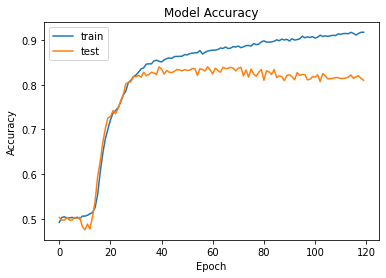

In [ ]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save("chatbot-model")

In [ ]:
model.load_weights("/content/chatbot-model")
pred_results = model.predict(([inputs_test, queries_test]))

32/32 [==============================] - 0s 2ms/step


Evalution of test data

In [ ]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [ ]:
story =' '.join(word for word in test_data[0][0])

In [ ]:
story

'Mary got the milk there . John moved to the bedroom .'

In [ ]:
query = ' '.join(word for word in test_data[0][1])

In [ ]:
query

'Is John in the kitchen ?'

In [ ]:
test_data[0][2]

'no'

In [ ]:
print("True Test Answer from Data is:",test_data[0][2])

True Test Answer from Data is: no


In [ ]:
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key


In [ ]:
print("Predicted answer is: ", k)


Predicted answer is:  yes


In [ ]:
print("Probability of certainty was: ", pred_results[0][val_max])


Probability of certainty was:  0.9906193


In [ ]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [ ]:
my_story = "John left the kitchen . Sandra went to the garden . Daniel is in the office . "
my_story.split()


['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'went',
 'to',
 'the',
 'garden',
 '.',
 'Daniel',
 'is',
 'in',
 'the',
 'office',
 '.']

In [ ]:
my_question = "Is Daniel in the office ? "
my_question.split()


['Is', 'Daniel', 'in', 'the', 'office', '?']

In [ ]:
mydata = [(my_story.split(),my_question.split(),'yes')]




In [ ]:
my_story,my_question,my_ans = vectorize_stories(mydata)



In [ ]:

pred_results = model.predict(([ my_story, my_question]))

1/1 [==============================] - 0s 13ms/step


In [ ]:
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
  if val == val_max:
    k == key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  yes
Probability of certainty was:  0.9906193
